In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outlier_qrcodes, convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

In [2]:
# for pixel outliers
import pickle
from tqdm import tqdm

def get_qrcode(artifact:str) -> str:
    return artifact.split('_')[1]

def get_path(row: pd.Series) -> str:
    return f"{str(DATASET_PATH)}/scans/{row.qrcode}/{row.key}/{row.artifact}"

### Total no. of artifacts in dataset

In [3]:
DATASET_PATH = Path('/mnt/datasets/95k_depthmap_trainingdata')

In [4]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  
0  1260  
1  1260  
2  1260  
3  1260  
4  1260

In [5]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  Years  
0  1260      3  
1  1260      3  
2  1260      3  
3  1260      3  
4  1260      3

### Total no. of children in the dataset

In [6]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
scans = artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


artifact  \
0   pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
11  pc_1583438084-zkafuhr4xx_1591122031563_100_000.p   
24  pc_1583438117-71v1y4z0gd_1592711198959_100_000.p   
33  pc_1583438117-spfyeecneo_1591122016705_100_000.p   
48  pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p   

                                         storage_path  height  weight  key  \
0   qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6   10.30  100   
11  qrcode/1583438084-zkafuhr4xx/measure/159112203...   104.4   14.80  100   
24  qrcode/1583438117-71v1y4z0gd/measure/159271119...   104.1   14.75  100   
33  qrcode/1583438117-spfyeecneo/measure/159112201...    98.3   12.55  100   
48  qrcode/1583438127-xt6z0e0tsu/measure/159112202...    89.7   11.50  100   

     age  Years                 qrcode  
0   1260      3  1583438052-nxew87bcv0  
11  1283      4  1583438084-zkafuhr4xx  
24  1398      4  1583438117-71v1y4z0gd  
33  1640      4  1583438117-spfyeecneo  
48   140      0  1583438127-xt6z0e0tsu

In [7]:
scans.describe()

height       weight          key           age        Years
count  4858.000000  4858.000000  4858.000000   4858.000000  4858.000000
mean     86.552491    10.951952   119.711198    934.587073     2.569164
std      11.742379     2.586094    40.019281   1133.370280     3.124526
min       7.900000     3.200000   100.000000      0.000000     0.000000
25%      77.925000     9.000000   100.000000    342.000000     1.000000
50%      88.050000    11.100000   100.000000    933.000000     3.000000
75%      95.600000    12.850000   101.000000   1420.750000     4.000000
max     114.700000    19.000000   202.000000  18179.000000    50.000000

2021-04-13 09:10:32,936 - INFO - 0     889
1     785
2     712
3     895
4     974
5     587
6       1
50     15
Name: Years, dtype: int64 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 25


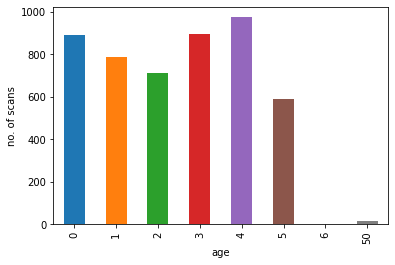

In [8]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


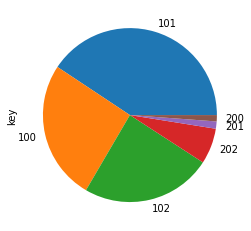

In [9]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

In [10]:
calculate_code_age_distribution(artifacts)

0     1     2     3      4
codes                               
100    5023   512  3312  5536   6564
101    7550   779  3705  9142  11086
102    4825   477  2723  5134   6230
200      80   857   162     0      7
201     163   883   201     8      0
202     622  4662   984    59     14

In [11]:
calculate_code_age_distribution(scans)

0    1    2    3    4
codes                         
100    671   75  492  793  901
101     67   17   37   51   46
102     57   14   37   42   25
200     10  106   20    0    1
201     11   54   15    1    0
202     73  519  111    8    1

### Distribution of height, weight and age against each other

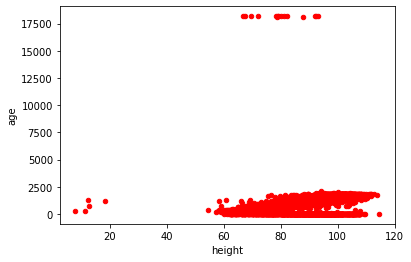

In [12]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

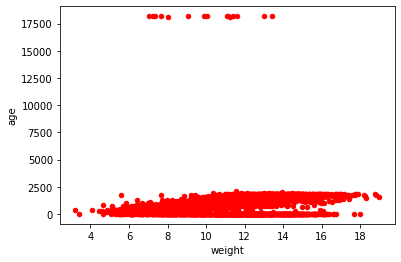

In [13]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight', y='age', c='red')

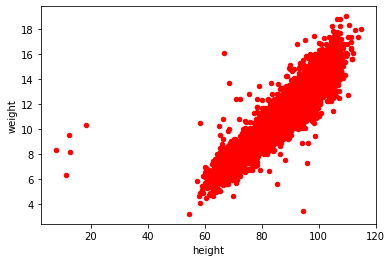

In [14]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [15]:
artifacts.describe()

height        weight           key           age         Years
count  96026.000000  96026.000000  96026.000000  96026.000000  96026.000000
mean      89.442885     11.557859    110.196291   1010.624498      2.772197
std       10.683023      2.354290     29.030214    924.643606      2.556919
min        7.900000      3.200000    100.000000      0.000000      0.000000
25%       83.200000     10.000000    100.000000    437.000000      1.000000
50%       90.800000     11.700000    101.000000   1130.000000      3.000000
75%       97.200000     13.250000    102.000000   1503.000000      4.000000
max      114.700000     19.000000    202.000000  18179.000000     50.000000

### 1) Check age

##### Check age < 6 months or  > 6 years

In [20]:
find_outlier_qrcodes(artifacts, 'age', '<365/2')

2021-04-13 09:10:34,180 - INFO - Running the following query: @df.age<365/2 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-13 09:10:34,188 - INFO - No. of unusual artifacts: 18263 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-13 09:10:34,192 - INFO - No. of unique outlier qr_codes: 1009 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-13 09:10:34,193 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-13 09:10:34,194 - INFO - No. of qrcodes: 1009 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-m

No. of qrcodes: %d 1009


['1583438127-xt6z0e0tsu',
 '1583462523-zolqj1h1so',
 '1583462542-nvwrue6sak',
 '1583465210-i5o9ye0f7y',
 '1583465223-o48oq5cow7',
 '1583465279-x22pprs96h',
 '1583465285-korju92su7',
 '1583465354-bpwt1kjvie',
 '1583465441-o63jswqdi6',
 '1583509239-rm7c0wryz7',
 '1583509243-hnuufbs00f',
 '1583509247-s0tyn6p2po',
 '1583509252-cz3nig7k49',
 '1583509261-0q1wtexp2w',
 '1583509359-dcs5c8f3yf',
 '1583509396-yquxv3fdnx',
 '1583509661-ysgg2ax7xr',
 '1583562305-8rffh5yasp',
 '1583655224-mdlgtfcuqd',
 '1583831700-0w3gzgbwci',
 '1583831791-fpncx73sp8',
 '1583831893-y533ypms77',
 '1583850151-7lqggqjbfz',
 '1583997887-kjl2onswvl',
 '1583998466-92e41regoe',
 '1584749198-hep3fegoiv',
 '1584749525-0kg15htr2u',
 '1584749533-f05glcu1g3',
 '1584749560-52k0733eqj',
 '1584749569-okss5ik7km',
 '1584749596-6ovictsvtz',
 '1584750047-e1ydqnj3xf',
 '1584750071-i44pm1b6j1',
 '1584750082-7y549ei3rw',
 '1584750318-oycdh7s35s',
 '1584750385-86jp7bipsm',
 '1584750393-r1yiighi2u',
 '1584750399-k93ugqgglq',
 '1584750403

In [21]:
find_outlier_qrcodes(artifacts, 'age', '>365*6')

2021-04-13 09:10:34,238 - INFO - Running the following query: @df.age>365*6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-13 09:10:34,244 - INFO - No. of unusual artifacts: 155 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-13 09:10:34,246 - INFO - No. of unique outlier qr_codes: 15 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-13 09:10:34,247 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-13 09:10:34,247 - INFO - No. of qrcodes: 15 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/

No. of qrcodes: %d 15


['1583710796-p68osilppn',
 '1583831904-13qoxucgul',
 '1584751648-u50v4ryc54',
 '1585001805-bv723pvcy0',
 '1585361240-nievyiqbdv',
 '1584998005-c5ddnj0vuc',
 '1584751846-e0ro1v86r2',
 '1584996738-hyxlj4cees',
 '1585011032-l23rao0l8r',
 '1585355880-o0kqvrzncj',
 '1585005264-o4vjkmj3o5',
 '1584995539-iry2pwtgjy',
 '1585274328-7g4vj56tk8',
 '1584995460-ewet5gjfer',
 '1585001723-az25md2fir']

### 2) Check weight

In [22]:
find_outlier_qrcodes(artifacts, 'weight', '<5.0')

2021-04-13 09:10:34,278 - INFO - Running the following query: @df.weight<5.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-13 09:10:34,283 - INFO - No. of unusual artifacts: 107 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-13 09:10:34,286 - INFO - No. of unique outlier qr_codes: 12 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-13 09:10:34,287 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-13 09:10:34,287 - INFO - No. of qrcodes: 12 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src

No. of qrcodes: %d 12


['1585366271-ok8vyfgcdw',
 '1585268854-t9dc711wl2',
 '1583464618-et67nim5pv',
 '1584997150-17hbdbbvst',
 '1584998076-071u80jhgb',
 '1585003269-r6u05tzkj7',
 '1585008564-6b2vy7vcbe',
 '1585271708-jc2k2d03jd',
 '1585273422-lr31sn53h1',
 '1585273699-0o50bij8vh',
 '1585353338-boa4phzps5',
 '1585366660-6cqmyjhmxu']

In [23]:
find_outlier_qrcodes(artifacts, 'weight', '>30.0')

2021-04-13 09:10:34,317 - INFO - Running the following query: @df.weight>30.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-13 09:10:34,322 - INFO - No. of unusual artifacts: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-13 09:10:34,325 - INFO - No. of unique outlier qr_codes: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-13 09:10:34,326 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-13 09:10:34,327 - INFO - No. of qrcodes: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/da

No. of qrcodes: %d 0


[]

### 3) Check height

In [52]:
find_outlier_qrcodes(artifacts, 'height', '<40.0')

2021-04-14 13:46:09,126 - INFO - Running the following query: @df.height<40.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-14 13:46:09,159 - INFO - No. of unusual artifacts: 158 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-14 13:46:09,162 - INFO - No. of unique outlier qr_codes: 6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-14 13:46:09,163 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-14 13:46:09,164 - INFO - No. of qrcodes: 6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/

No. of qrcodes: %d 6


['1583855791-ldfc59ywg5',
 '1583997882-3jqstr1119',
 '1584998372-d85ogmqucw',
 '1585274424-3oqa4i262a',
 '1585366118-qao4zsk0m3',
 '1585360775-fa64muouel']

In [25]:
find_outlier_qrcodes(artifacts, 'height', '>150.0')

2021-04-13 09:10:34,395 - INFO - Running the following query: @df.height>150.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 59
2021-04-13 09:10:34,400 - INFO - No. of unusual artifacts: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 61
2021-04-13 09:10:34,402 - INFO - No. of unique outlier qr_codes: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 63
2021-04-13 09:10:34,403 - INFO - Extracting qr_codes... - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 64
2021-04-13 09:10:34,404 - INFO - No. of qrcodes: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/d

No. of qrcodes: %d 0


[]

### 4) Check pixel values

In [26]:
# check for depthmap pixel values < 0 and > 10, values found by MH through investigation
artifacts['qrcode'] = artifacts.storage_path.apply(get_qrcode)
artifacts['path'] = artifacts.apply(get_path, axis=1)

In [27]:
artifacts.head()

artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  Years                 qrcode  \
0  1260      3  1583438052-nxew87bcv0   
1  1260      3  1583438052-nxew87bcv0   
2  1260      3  1583438052-nxew87bcv0   
3  1260      3  1583438052-nxew87bcv0   
4  1260      3  1583438052-nxew87bcv0   

                                                path  
0  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
3  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
4  /mnt/datasets/95k_depthmap_trainingdata/scans/...

In [28]:
! ls {artifacts.path.iloc[0]}

/mnt/datasets/95k_depthmap_trainingdata/scans/1583438052-nxew87bcv0/100/pc_1583438052-nxew87bcv0_1591122011044_100_000.p


In [29]:
unusual_pixel_artifacts = []
for path in tqdm(artifacts['path']):
    depthmap, targets = pickle.load(open(path, "rb"))
    max_value = depthmap.max()
    if max_value >= 10:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly big) maximal pixel value of {max_value}")
    min_value = depthmap.min()
    if min_value < 0:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly small) minimal pixel value of {max_value}")

 47%|████▋     | 45177/96026 [25:09<30:51, 27.46it/s]  

/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p has a (unexpectedly big) maximal pixel value of 714286.0


100%|██████████| 96026/96026 [55:06<00:00, 29.04it/s]  


In [30]:
unusual_pixel_artifacts

['/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p']

##### Find outlier qr-codes for depthmap pixel values < 0 and > 10

In [31]:
unusual_qrcodes_pixel = str(unusual_pixel_artifacts).split('/')[5]
print(len(unusual_pixel_artifacts))
print(unusual_qrcodes_pixel)

1
1585010027-xb21f31tvj
